In [1]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# # 경고 메시지는 출력되지 않게 합니다.
# import warnings
# warnings.filterwarnings("ignore")

python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
numpy 1.23.5
pandas 1.5.3
matplotlib 3.7.1
seaborn 0.12.2


,학년,학번,1,2,3,4,5,6,7,8,9,10,11,12,13,14,sum
25,3,19,2,0,2,0,1,1,2,2,2,2,2,0,0,0,16
3,3,19,2,2,1,0,2,1,2,2,2,2,2,0,2,2,22
30,3,21,2,0,2,0,2,1,1,2,2,2,2,2,2,0,20


## 점수 별 학생 수


28    8
27    1
26    1
22    3
21    1
20    2
19    2
18    1
17    1
16    4
15    1
14    2
13    1
10    1
9     2
8     3
7     1
6     2
2     2
Name: sum, dtype: int64

## 문항 별 정답 수


0
6     13.5
12    14.5
2     16.0
14    17.0
3     18.0
4     20.5
13    25.0
8     26.5
9     27.5
11    27.5
10    29.5
7     32.0
5     32.5
1     36.0
dtype: float64

<Axes: ylabel='Frequency'>

<Axes: xlabel='학년', ylabel='sum'>

<Axes: xlabel='학번', ylabel='sum'>

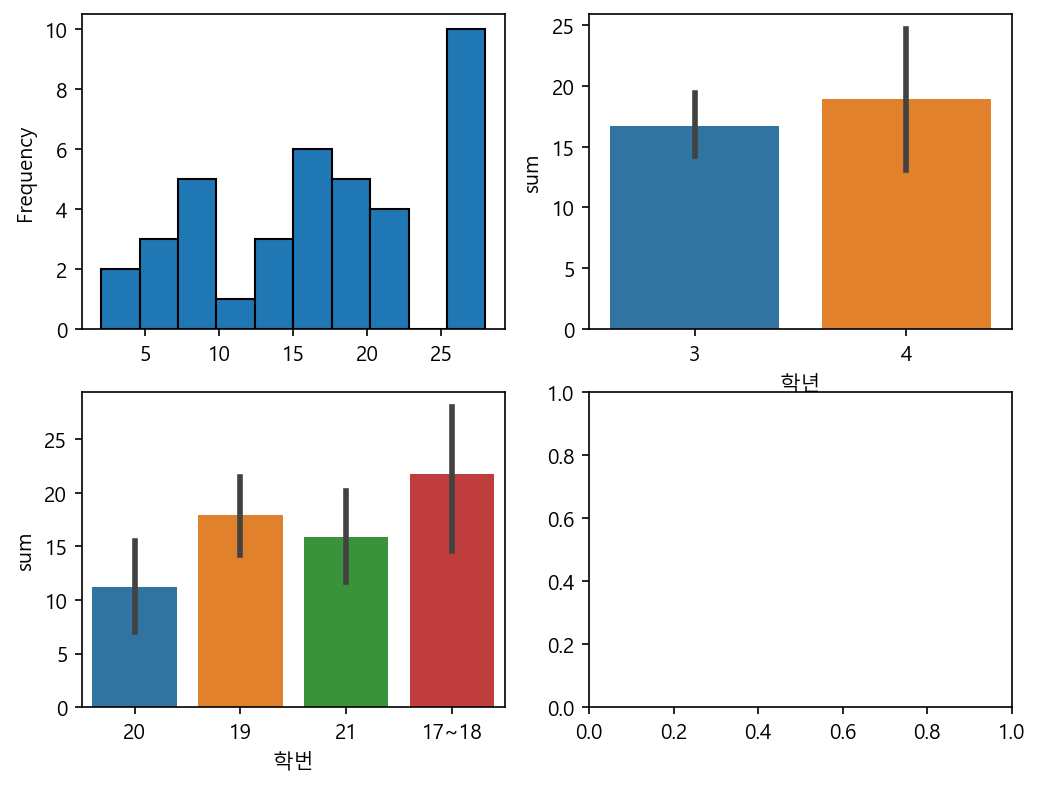

In [13]:
df = pd.read_table("da_금_성적.txt",sep='\t', encoding="cp949", header=None, index_col=0).T
for col in df.columns:
    df[col]=df[col].astype(int)

df['학번']=df['학번'].map(lambda x: str(x)[:2])
df['학번']=df['학번'].replace({'17':'17~18','18':'17~18'})
df.sample(3)

print("## 점수 별 학생 수")
df['sum'].value_counts().sort_index(ascending=False)
print("## 문항 별 정답 수")
(df.iloc[:,2:-1].sum(axis=0)/2).sort_values()

fig=plt.figure(figsize=(8, 6), dpi=150)
axs=fig.subplots(2,2).flatten()

df['sum'].plot.hist(ax=axs[0], bins=10, edgecolor='k')
sns.barplot(data=df, x='학년',y='sum', ax=axs[1])
sns.barplot(data=df, x='학번',y='sum', ax=axs[2])